In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("dataframe_exercicio_modulo_9.csv")
df

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
0,F,18,GT3,A,2,2,yes,no,no,no,no,no,4,3,4,6,6
1,F,17,GT3,T,1,2,no,yes,no,no,yes,no,5,3,3,4,6
2,F,15,LE3,T,1,2,yes,no,yes,no,yes,no,4,3,2,10,10
3,F,15,GT3,T,1,3,no,yes,yes,yes,yes,yes,3,2,2,2,15
4,F,16,GT3,T,1,2,no,yes,yes,no,no,no,4,3,2,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,F,19,GT3,T,1,3,no,no,no,yes,yes,no,5,4,2,4,10
1040,F,18,LE3,T,1,2,no,yes,no,no,yes,no,4,3,4,4,16
1041,F,18,GT3,T,2,2,no,no,no,yes,no,no,1,1,1,6,9
1042,M,17,LE3,T,2,1,no,no,no,no,yes,no,2,4,5,6,10


Atributos do dataset:
    
    1- 'sex': sexo
    
    2- 'age': idade
    
    3- 'famsize': tamanho da família; LE3 - famílias com no máximo 3 pessoas, GT3 caso contrário
    
    4- 'Pstatus': status de habitação com os pais; T - mora junto com os pais, A - mora separado;
    
    5- 'traveltime': tempo de viagem entre escola e casa; 
        1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hora, or 4 - >1 hora
        
    6- 'studytime': tempo de estudo semanal; 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, ou 4 - >10 horas
    
    7- 'schoolsup': suporte educacional extra escola
    
    8- 'famsup': suporte educacional da família
    
    9- 'paid': pagou aulas particulares por fora 
    
    10- 'activities': atividades extra-curriculares
    
    11- 'internet': acesso a internet em casa
    
    12- 'romantic': se está num relacionamento
    
    13- 'famrel': qualidade das relações familiares; 1 - muito ruim a 5 - muito boa
    
    14- 'freetime': tempo livre após escola; 1 - muito pouco até 5 - muito
    
    15- 'goout': relaciona-se com amigos; 1 - muito pouco até 5 - muito
    
    16- 'absences': quantidade de faltas na escola
    
    17- 'G3': nota média final no ensino médio
    
<br>

No dataset acima, faça uma __análise exploratória__ geral, bem como __pré-processamentos__ nas variáveis.

Considere a variável __'G3'__ como a __variável target__ do problema - contexto de __regressão.__

Teste __diferentes modelos de regressão__ a fim de explicar a variável target. Use a metodologia da __validação cruzada__ e o __coeficiente de determinação ($R^{2}$)__ como métrica de performance.

Plote __gráficos__ personalizados com os resultados.

In [3]:
# 1 etapa) Para realização deste exercício a primeira etapa a ser realizada é a Coleta de Dados. 
# Como a carga dos dados já foi feita, será dado o andamento a importação das bibliotecas necessárias:

# Análise de Dados
import numpy as np
import matplotlib.pyplot as plt

# Pré-Processamento de Dados
from sklearn.preprocessing import MinMaxScaler

# Divisão de dataset
from sklearn.model_selection import train_test_split, cross_val_score

# Algoritmos
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Métricas de performance
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
# 1.1) Com o intuito de observar quais as informações gerais do dataset de estudo, será verificado como estão distribuidas as informações: nome de cada coluna, o núemro de linhas por coluna e o tipo de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         1044 non-null   object
 1   age         1044 non-null   int64 
 2   famsize     1044 non-null   object
 3   Pstatus     1044 non-null   object
 4   traveltime  1044 non-null   int64 
 5   studytime   1044 non-null   int64 
 6   schoolsup   1044 non-null   object
 7   famsup      1044 non-null   object
 8   paid        1044 non-null   object
 9   activities  1044 non-null   object
 10  internet    1044 non-null   object
 11  romantic    1044 non-null   object
 12  famrel      1044 non-null   int64 
 13  freetime    1044 non-null   int64 
 14  goout       1044 non-null   int64 
 15  absences    1044 non-null   int64 
 16  G3          1044 non-null   int64 
dtypes: int64(8), object(9)
memory usage: 138.8+ KB


O dataframe possui 17 colunas, sendo que os dados das colunas podem ser classificados da seguinte forma:

- Númericas:

variáveis discretas: traveltime, studytime, famrel, freetime, goout e G3.<br>
variáveis contínuas: age, absences. <br>

- Categóricas:

nominais: sex, famsize, Pstatus, schoolsup, famsup, paid, activities, internet e romantic.

Em outras palavras, as variáveis númericas do dataset são do tipo int64 e as categóricas do tipo object. Além disso, é importante ressaltar que em todas as colunas os dados estão preenchidos, ou seja, não há dados faltantes em nenhuma das variáveis.


In [5]:
# 2 etapa) Para continuidade, a segunda etapa será análise exploratória e o pré-processamento dos dados.
# 2.1)Inicialmente será feito a análise de exploratória com o objetivo de responder algumas perguntas como:
# (a) No estudo realizado qual a quantidade de estudantes que tinham acesso a internet, separado por sexo?
df['internet'].value_counts()


yes    827
no     217
Name: internet, dtype: int64

In [6]:
# (b) Qual a procura por aulas particulares por sexo?
df.groupby('sex')[u'paid'].value_counts()

sex  paid
F    no      466
     yes     125
M    no      358
     yes      95
Name: paid, dtype: int64

Por está análise, tem-se que a proporção entre os estudantes que procuraram e que não procuraram é a mesma para ambos os sexos.

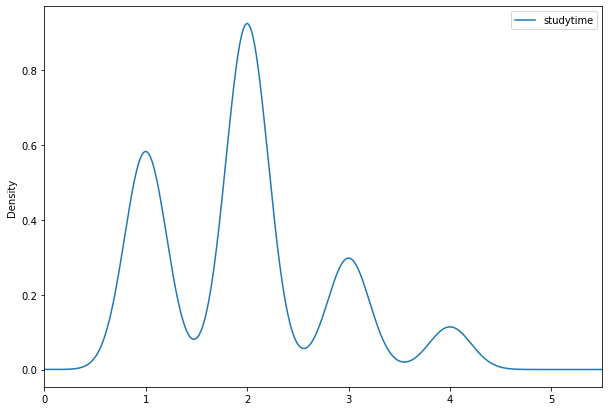

In [7]:
# (c) Como se concentra a tempo de estudo entre os estudantes analisados?
df.plot.density(y='studytime', xlim=[0,5.5], figsize = [10,7])
plt.show()

A maior parte dos estudantes dedicavam 2 a 5 horas por semana aos estudos.

In [8]:
# 2.2) Em seguida, será feito o tratamento das variáveis númericas. Para isso, será feito uma breve visualização dos dados estátisticos no dotaset de estudo:
df.describe()

,age,traveltime,studytime,famrel,freetime,goout,absences,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,1.522989,1.970307,3.935824,3.201149,3.156130,4.434866,11.341954
std,1.239975,0.731727,0.834353,0.933401,1.031507,1.152575,6.210017,3.864796
min,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,1.000000,1.000000,4.000000,3.000000,2.000000,0.000000,10.000000
50%,17.000000,1.000000,2.000000,4.000000,3.000000,3.000000,2.000000,11.000000
75%,18.000000,2.000000,2.000000,5.000000,4.000000,4.000000,6.000000,14.000000
max,22.000000,4.000000,4.000000,5.000000,5.000000,5.000000,75.000000,20.000000


Observando as medidas de resumo, pode-se pontuar algumas considerações:

- O valor do desvio padrão da variável absences se encontra elevado;

- Os valores da média (mean) e da mediana (q50) para as variáveis age e absences não estão muito próximos, o que pode se tratar da presença de outliers. 


O desvio padrão elevado pode ser tratado com técnicas de normalização, enquanto que para o caso dos outliers a remoção pode ser ou não feita, uma vez que a presença deste pontos também podem revelar insights.

A princípio será investigado a presença dos outliers, uma vez que a própria presença destes outliers nessas variáveis é que estejam causando influência sobre o valor da média e do desvio padrão.

In [9]:
# Verificando a consistencia de dados atráves da investigação de outliers
# Escrevendo uma função para detectar outliers
def detecta_outlier(x, limite = 1.5):
    dq = np.percentile(x, 75) - np.percentile(x, 25)
    limite_inf = np.maximum(np.percentile(x, 25) - limite * dq, np.min(x))
    limite_sup = np.minimum(np.percentile(x, 75) + limite * dq, np.max(x))
    print(f"Limite inferior: {limite_inf}. \nLimite superior: {limite_sup}.")      

In [10]:
# Aplicando a função as variáveis 'age' and 'absence'
print('\n Outliers variável "age"')
outliers_age = detecta_outlier(df.age, limite = 1.5)

print('\n Outliers variável "absences"')
outliers_absences = detecta_outlier(df.absences)



 Outliers variável "age"
Limite inferior: 15.0. 
Limite superior: 21.0.

 Outliers variável "absences"
Limite inferior: 0.0. 
Limite superior: 15.0.


Logo, pode ser concluir que tanto para a variável 'age' quanto para a 'absence, todos os pontos acima do limite superior são outliers.

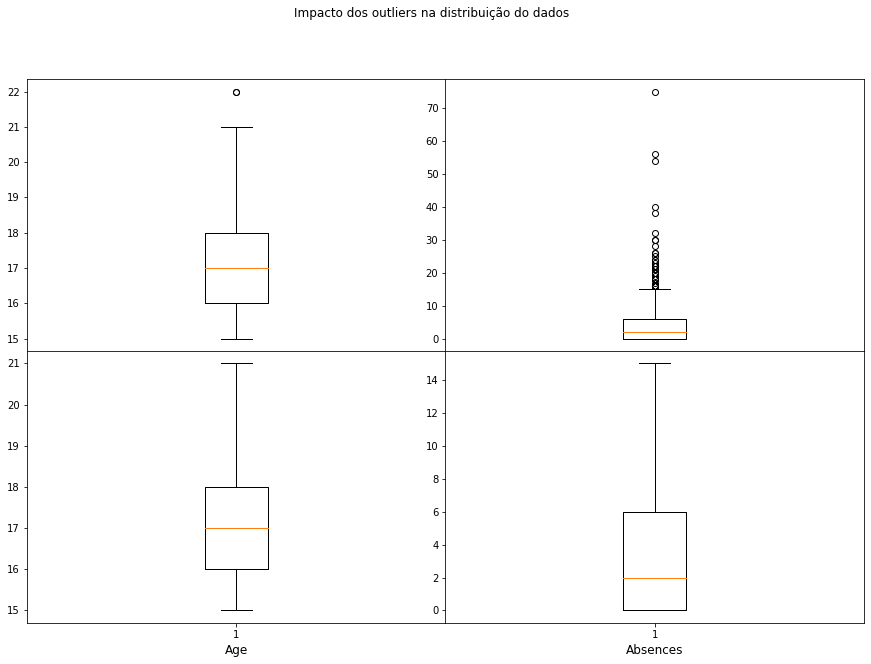

In [11]:
# Criando um boxplot para a visualização dos impacto dos outliers na distribuição do dados

fig = plt.figure(figsize=(15,10))
plt.suptitle('Impacto dos outliers na distribuição do dados') 

plt.subplot(2,2,1) 
plt.boxplot(df.age, meanline = True)
plt.xlabel('Age', {'fontsize': 12})

plt.subplot(2,2,2)
plt.boxplot(df.absences, meanline = True)
plt.xlabel('Absences', {'fontsize': 12})

plt.subplot(2,2,3) 
plt.boxplot(df.age, showfliers = False)
plt.xlabel('Age', {'fontsize': 12})

plt.subplot(2,2,4)
plt.boxplot(df.absences, showfliers = False)
plt.xlabel('Absences', {'fontsize': 12})

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

A Figura 1 apresenta que a variável 'age' apresenta apenas um outlier, sendo que a sua possível remoção não causa um impacto relevante nas medidas de resumo. Por outro lado, isso não aconteceria com a variável 'absences' que apresenta muitos outliers e caso se deseje realizar alguma avaliação com essa variável é interessante o tratamento desses valores.

Também é possível investigar quantos pontos são outliers e ter uma noção se a eliminação destes dados causaria muito impacto em toda a amostragem.

In [12]:
# Investigando a quantidade de outliers
inv_outliers = df['absences']
c = 0
for n in inv_outliers:
    if n > 15:
        c+=1
   
print(f'Há {c} pontos que são outliers e isso representa representa {(c/1043)*100:.1f} % dos dados da coluna absences.')

Há 54 pontos que são outliers e isso representa representa 5.2 % dos dados da coluna absences.


In [13]:
# Removendo os ouliers da variável 'absence' e da 'age'
df_limpo = df.loc[(df['absences'] > 15) | (df['age'] > 21)]

# Resetando a indexação do dataframe
df_limpo = df.drop(df_limpo.index)

In [14]:
# Verificando as medidas de resumo
df_limpo.describe()

,age,traveltime,studytime,famrel,freetime,goout,absences,G3
count,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000
mean,16.690597,1.527806,1.987867,3.936299,3.197169,3.148635,3.419616,11.404449
std,1.214505,0.738259,0.842840,0.937839,1.028221,1.146704,3.780793,3.896721
min,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,1.000000,1.000000,4.000000,3.000000,2.000000,0.000000,10.000000
50%,17.000000,1.000000,2.000000,4.000000,3.000000,3.000000,2.000000,11.000000
75%,18.000000,2.000000,2.000000,5.000000,4.000000,4.000000,6.000000,14.000000
max,21.000000,4.000000,4.000000,5.000000,5.000000,5.000000,15.000000,20.000000


In [15]:
df_limpo.shape

(989, 17)

Observando as medidas de resumo para a variável'absences' com a remoção dos outliers houve uma diminuição significativa no desvio padrão e uma melhor aproximação entre os valores de média e mediana, se comparado com o cenário inicial. Contudo, como o desvio ainda está alto será aplicado a normalização dos dados. O método não será aplicado somente nesta variavel, mas também demais que são numéricas, uma vez que as escalas são diferentes. Além disso a normalização é para que durante a modelagem alguns algoritmos funcionem corretamente. 
Antes de dar continuidade ao tratamento de dados será feito a separação da variável target para que não ocorra uma modificação indevida. Assim, adiante será dado o tratamento para a normalização.

In [16]:
# Separação das variáveis
y = df_limpo['G3']
X = df_limpo
X = df_limpo.drop('G3', axis = 1)

In [17]:
# Separando as variaveis númericas das categoricas
x_num = ['age','traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'absences']
x_categoricas = list(set(X) - set(x_num))

In [18]:
x_cat = X[x_categoricas]
x_cat

,famsize,schoolsup,Pstatus,sex,paid,famsup,internet,activities,romantic
0,GT3,yes,A,F,no,no,no,no,no
1,GT3,no,T,F,no,yes,yes,no,no
2,LE3,yes,T,F,yes,no,yes,no,no
3,GT3,no,T,F,yes,yes,yes,yes,yes
4,GT3,no,T,F,yes,yes,no,no,no
...,...,...,...,...,...,...,...,...,...
1039,GT3,no,T,F,no,no,yes,yes,no
1040,LE3,no,T,F,no,yes,yes,no,no
1041,GT3,no,T,F,no,no,no,yes,no
1042,LE3,no,T,M,no,no,yes,no,no


In [19]:
#Transformando os valores tipo 'strings' para númericos
dic_sex = {'F': 0, 'M':1}
X['sex'] = X.sex.map(dic_sex)
dic_famsize = {'GT3': 0, 'LE3': 1}
X['famsize'] = X.famsize.map(dic_famsize)
dic_Pstatus = {'A':0, 'T':1}
X['Pstatus'] = X.Pstatus.map(dic_Pstatus)
dic_schoolsup = {'yes': 0, 'no':1}
X['schoolsup']= X.schoolsup.map(dic_schoolsup)
dic_famsup = {'yes': 0, 'no':1}
X['famsup'] = X.famsup.map(dic_famsup)
dic_paid = {'yes':0, 'no':1}
X['paid'] = X.paid.map(dic_paid)
dic_activities = {'yes':0, 'no':1}
X['activities']= X.activities.map(dic_activities)
dic_internet = {'yes':0, 'no':1}
X['internet'] = X.internet.map(dic_internet)
dic_romantic = {'yes':0, 'no':1}
X['romantic']= X.romantic.map(dic_romantic)

In [20]:
X.head()

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences
0,0,18,0,0,2,2,0,1,1,1,1,1,4,3,4,6
1,0,17,0,1,1,2,1,0,1,1,0,1,5,3,3,4
2,0,15,1,1,1,2,0,1,0,1,0,1,4,3,2,10
3,0,15,0,1,1,3,1,0,0,0,0,0,3,2,2,2
4,0,16,0,1,1,2,1,0,0,1,1,1,4,3,2,4


In [21]:
mmscaler = MinMaxScaler()

In [22]:
X[x_num] = mmscaler.fit_transform(X[x_num])
X[x_num]

,age,traveltime,studytime,famrel,freetime,goout,absences
0,0.500000,0.333333,0.333333,0.75,0.50,0.75,0.400000
1,0.333333,0.000000,0.333333,1.00,0.50,0.50,0.266667
2,0.000000,0.000000,0.333333,0.75,0.50,0.25,0.666667
3,0.000000,0.000000,0.666667,0.50,0.25,0.25,0.133333
4,0.166667,0.000000,0.333333,0.75,0.50,0.25,0.266667
...,...,...,...,...,...,...,...
1039,0.666667,0.000000,0.666667,1.00,0.75,0.25,0.266667
1040,0.500000,0.000000,0.333333,0.75,0.50,0.75,0.266667
1041,0.500000,0.333333,0.333333,0.00,0.00,0.00,0.400000
1042,0.333333,0.333333,0.000000,0.25,0.75,1.00,0.400000


In [23]:
X.head()

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences
0,0,0.500000,0,0,0.333333,0.333333,0,1,1,1,1,1,0.75,0.50,0.75,0.400000
1,0,0.333333,0,1,0.000000,0.333333,1,0,1,1,0,1,1.00,0.50,0.50,0.266667
2,0,0.000000,1,1,0.000000,0.333333,0,1,0,1,0,1,0.75,0.50,0.25,0.666667
3,0,0.000000,0,1,0.000000,0.666667,1,0,0,0,0,0,0.50,0.25,0.25,0.133333
4,0,0.166667,0,1,0.000000,0.333333,1,0,0,1,1,1,0.75,0.50,0.25,0.266667


In [24]:
# 3 etapa) A seguinte etapa consiste na realização da Modelagem. 
# 3.1) A variável target escolhida é a 'G3' e nela será verificado a correlação com as demais
df.corr()['G3']

age          -0.125282
traveltime   -0.102627
studytime     0.161629
famrel        0.054461
freetime     -0.064890
goout        -0.097877
absences     -0.045671
G3            1.000000
Name: G3, dtype: float64

Para este dataset a variável study_time possui a mais alta correlação com G3. Uma análise preliminar permite considerar que aqueles estudantes que estudavam mais horas durante a semana também obtiveram maior nota média final no Ensino Médio. Contudo, como o valor da correlação é próximo de zero a relação entre as variáveis não será muito linear.

In [25]:
# 3.2) Para avaliar a modelagem será feita a divisão do dataset

X_traino, X_teste, y_traino, y_teste = train_test_split(X, y, test_size=0.58, random_state=42,shuffle=True)
print(X.shape, y.shape)
print(X_traino.shape, y_traino.shape)
print(X_teste.shape, y_teste.shape)

(989, 16) (989,)
(415, 16) (415,)
(574, 16) (574,)


In [26]:
# 3.3) Testando alguns modelos de regressão linear utilizando a métrica de perfomance do R2

# Regressão linear

# Definido o modelo
LinReg = LinearRegression()
# Fitando o modelo
LinReg.fit(X_traino, y_traino)

# Calculando o RMSE
RMSE = np.sqrt(mean_squared_error(y_traino, LinReg.predict(X_traino)))

# Calculando r2
R2 = np.round(r2_score(y_traino, LinReg.predict(X_traino)),3)

print("A métricas para o contexto Regressão Linear foram:\nRMSE =", RMSE, "e R2 =", R2, ".")


A métricas para o contexto Regressão Linear foram:
RMSE = 3.5420225518295116 e R2 = 0.082 .


In [27]:
# KNN

error_knn = []
print("A métricas para o contexto KNeighborsRegressor foram:")

for n in range (1,10):
    # Definido o modelo
    knn = KNeighborsRegressor(n_neighbors = n)
    # Fitando o modelo
    knn.fit(X_traino, y_traino)
    
    # Calculando o RMSE
    RMSE = round(np.sqrt(mean_squared_error(y_traino, knn.predict(X_traino))),2)
    
    # Calculando r2
    R2 = np.round(r2_score(y_traino, knn.predict(X_traino)),2)
    error_knn.append (np.mean(knn.predict(X_teste) != y_teste))
                 
    print("RMSE =", RMSE, "e R2 =", R2, ", com knn =", n, ".")

A métricas para o contexto KNeighborsRegressor foram:
RMSE = 0.29 e R2 = 0.99 , com knn = 1 .
RMSE = 2.36 e R2 = 0.59 , com knn = 2 .
RMSE = 2.89 e R2 = 0.39 , com knn = 3 .
RMSE = 3.16 e R2 = 0.27 , com knn = 4 .
RMSE = 3.22 e R2 = 0.24 , com knn = 5 .
RMSE = 3.31 e R2 = 0.2 , com knn = 6 .
RMSE = 3.35 e R2 = 0.18 , com knn = 7 .
RMSE = 3.37 e R2 = 0.17 , com knn = 8 .
RMSE = 3.43 e R2 = 0.14 , com knn = 9 .


In [28]:
# Árvore de Decisão

error_dtr = []
print("As métricas para o contexto Árvore de Decisão foram:")

for m in range (1,10):
    # Definido o modelo
    dtr = DecisionTreeRegressor(max_depth = m)
    # Fitando o modelo
    dtr.fit(X_traino, y_traino)
    
    # Calculando o RMSE
    RMSE = round(np.sqrt(mean_squared_error(y_traino, dtr.predict(X_traino))),2)
    
    # Calculando r2
    R2 = np.round(r2_score(y_traino, dtr.predict(X_traino)),2)
    error_dtr.append (np.mean(dtr.predict(X_teste) != y_teste))
    
    print("RMSE =", RMSE, "e R2 =", R2, ", com profundidade da árvore =", m,".")

As métricas para o contexto Árvore de Decisão foram:
RMSE = 3.65 e R2 = 0.02 , com profundidade da árvore = 1 .
RMSE = 3.57 e R2 = 0.07 , com profundidade da árvore = 2 .
RMSE = 3.45 e R2 = 0.13 , com profundidade da árvore = 3 .
RMSE = 3.29 e R2 = 0.21 , com profundidade da árvore = 4 .
RMSE = 3.06 e R2 = 0.31 , com profundidade da árvore = 5 .
RMSE = 2.77 e R2 = 0.44 , com profundidade da árvore = 6 .
RMSE = 2.49 e R2 = 0.55 , com profundidade da árvore = 7 .
RMSE = 2.0 e R2 = 0.71 , com profundidade da árvore = 8 .
RMSE = 1.61 e R2 = 0.81 , com profundidade da árvore = 9 .


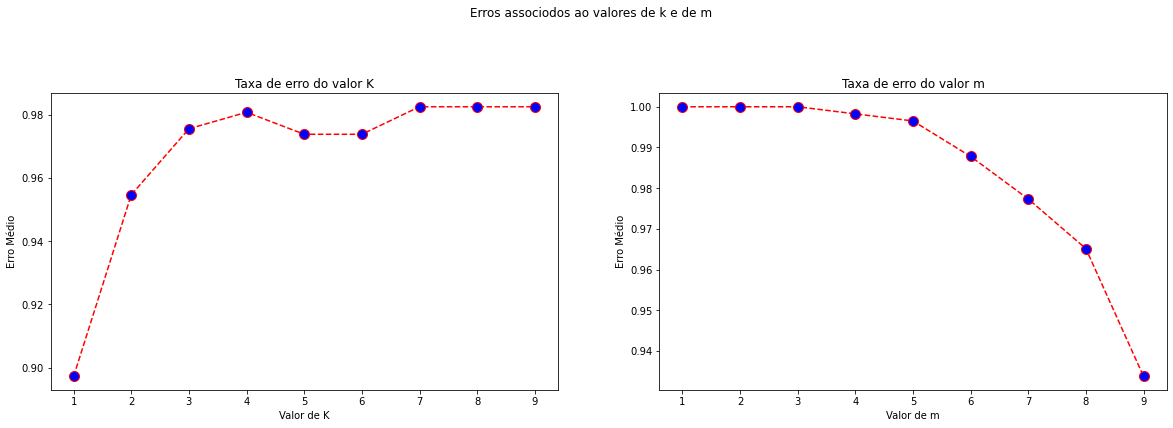

In [29]:
# Verificando o erro associado aos valores de k e m
fig = plt.figure(figsize=(20,12))
plt.suptitle('Erros associodos ao valores de k e de m') 

plt.subplot(2,2,1)
plt.plot(range(1,10), error_knn, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Taxa de erro do valor K')
plt.xlabel('Valor de K')
plt.ylabel('Erro Médio')

plt.subplot(2,2,2)
plt.plot(range(1,10), error_dtr, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Taxa de erro do valor m')
plt.xlabel('Valor de m')
plt.ylabel('Erro Médio')
plt.show()


Diante dos resultados de RMSE e R2 para os modelos de regressão linear, KNN e árvore de decisão foram escolhido alguns valores para a persolização:

- Regressão Linear;
- KNN (nos valores de k = 1, 2 e 5);
- Árvore de decisão (nos valores de 5, 7 e 9).

Com o intuito de avaliar a possibilidade de overfitting, será feito o plot para o valor de KNN, com k=1, e árvore de decisão com profundidade de 9.
Para os valores de 2 e 5 para o KNN e 5 e 7 para Árvore de Decisão, a escolha se deu por apresentarem valores de RMSE e R2 interessantes, além de possuirem um erro não muito alto, segundo os gráficos acima.

In [30]:
# 3.4) Escrevendo uma função para a exibição dos gráficos conforme o modelo escolhido

def cross_validation_R2_results (modelo, nome_modelo, X, y, num_folds):
    cv_results = cross_val_score(estimator = modelo, X = X_traino, y = y_traino, cv = num_folds, scoring = 'r2')
    
    # Treinando o modelo escolhido
    modelo.fit(X_traino, y_traino)
    r2_train = r2_score(y_traino, modelo.predict(X_traino))
    
    # Ajustando o tamanho da figura
    plt.figure(figsize = [8,6])
    
    # Retas
    plt.scatter(range(1, 1 + num_folds), cv_results, c = 'blue', s = 100)
    plt.plot(range(1, 1+num_folds), cv_results, c = 'blue', lw = 2, label='R2 Fold')
    plt.plot(range(1, 1+num_folds), [cv_results.mean()]*num_folds, c = 'red', lw = 2, label='R2 Cross-val Médio')
    plt.plot(range(1, 1+num_folds), [cv_results.mean() + cv_results.std()] * num_folds, '--', c = 'gray', lw = 2, label = '+1 desv. padrão margem')
    plt.plot(range(1, 1+num_folds), [cv_results.mean() - cv_results.std()] * num_folds, '--', c = 'gray', lw = 2, label = '-1 desv. padrão margem')
    plt.plot(range(1, 1+num_folds), [r2_train] * num_folds, '--' ,c = 'black', lw = 3, label = 'R2 Treino')
   
    # Escala dos eixos
    plt.xticks(range(1, 1+num_folds))
    plt.yticks(np.arange(-1.5, 1.5, 0.3))
        
    # Caixa de legenda
    plt.legend(fontsize = 10, bbox_to_anchor = [1.4,1.])
    
    #Limite do eixo y
    plt.ylim([-1.5,1.5])
    
    # Aparência de grades no gráfico
    plt.grid()
    
    # legenda dos eixos
    plt.ylabel("R2 Score", fontsize = 14, fontweight = 'bold')
    plt.xlabel("Folds", fontsize = 14, fontweight = 'bold')
    
    # Título do gráfico
    plt.title(nome_modelo + " | R2 TREINO/VAL: "+ str(np.round(r2_train,2)) +" / "+ str(np.round(cv_results.mean(),2)), fontsize = 14, fontweight = 'bold')
    
    # Apresentando o gráfico
    plt.show()

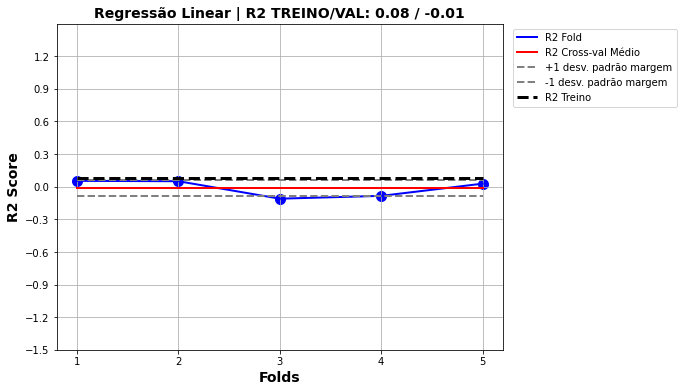

In [31]:
cross_validation_R2_results(modelo = LinearRegression(), nome_modelo = 'Regressão Linear', X = X_traino, y = y_traino, num_folds = 5)

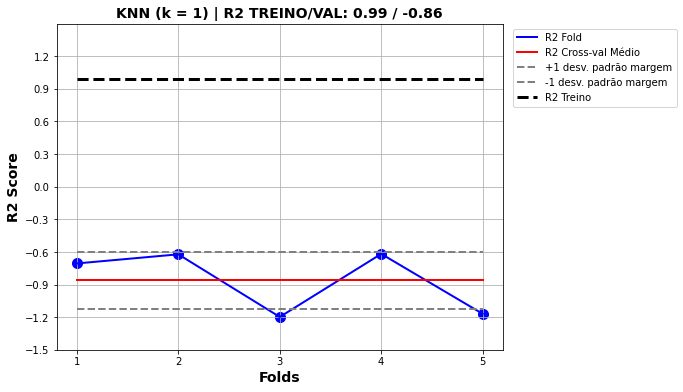

In [32]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 1), nome_modelo = 'KNN (k = 1)', X = X_traino, y = y_traino, num_folds = 5)

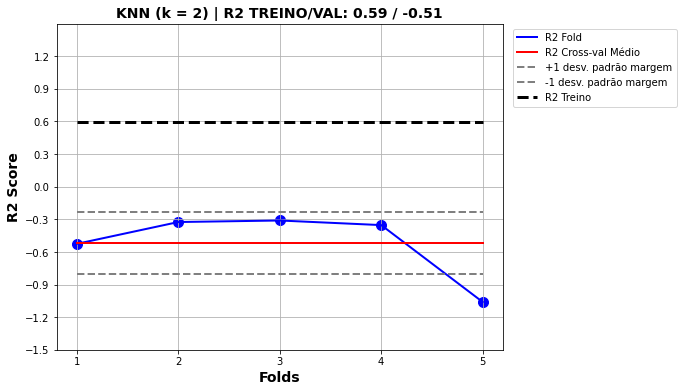

In [33]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 2), nome_modelo = 'KNN (k = 2)', X = X_traino, y = y_traino, num_folds = 5)

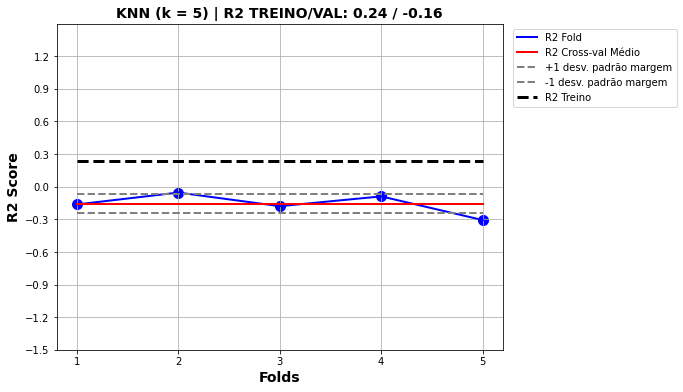

In [34]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 5), nome_modelo = 'KNN (k = 5)', X = X_traino, y = y_traino, num_folds = 5)

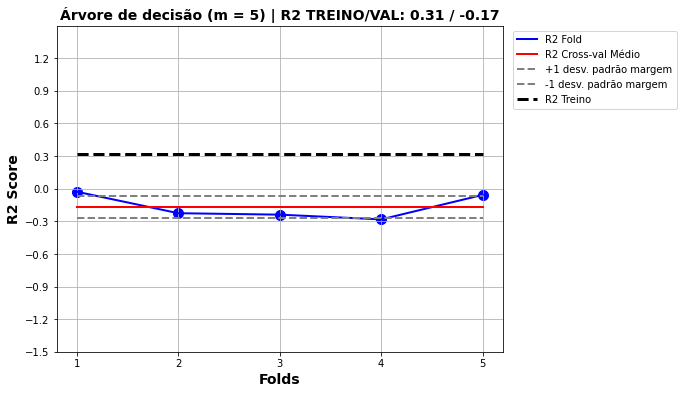

In [35]:
cross_validation_R2_results(modelo =  DecisionTreeRegressor(max_depth = 5), nome_modelo = 'Árvore de decisão (m = 5)', X = X_traino, y = y_traino, num_folds = 5)

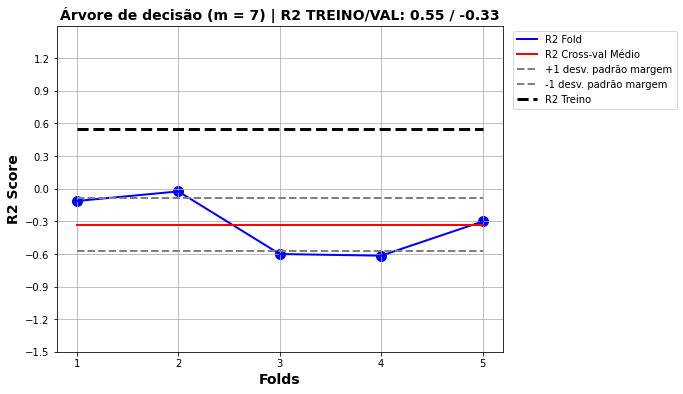

In [36]:
cross_validation_R2_results(modelo =  DecisionTreeRegressor(max_depth = 7), nome_modelo = 'Árvore de decisão (m = 7)', X = X_traino, y = y_traino, num_folds = 5)

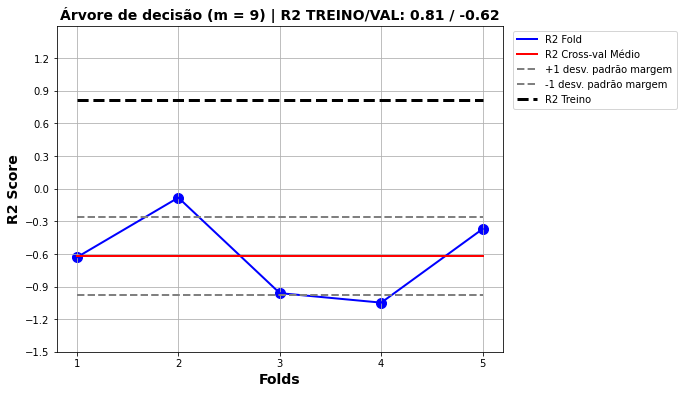

In [37]:
cross_validation_R2_results(modelo =  DecisionTreeRegressor(max_depth = 9), nome_modelo = 'Árvore de decisão (m = 9)', X = X_traino, y = y_traino, num_folds = 5)

Diante dos resultados acima, foi observado que há valores para os valores de KNN, com k=1, e árvore de decisão com profundidade de 9 houve overfitting. Em outrous valores o gap entre o R2 de treino e R2 médio foi razoavelmente significativo, levantando a suspeita de overfitting para KNN com k=2 e Árvore de Decisão com m = 7. 
Além disso, o que se pode observar nos demais é que o valor de R2 ficou aparentemente baixo para maioria das amostras (Regressão Linear, KNN k =5 e Árvore de Decisão m = 5). Contudo, isso era esperado, uma vez que os valores de correlação entre as variávis preditoras com a explicativa são relativamente baixos. Por se tratar um estudo onde tenta prever o comportamento humano, valores de R-quadrado menores que 50% são esperados[1].
Para KNN k =5 e Árvore de Decisão m = 5 tivemos valores semelhantes entre si, mas para aplicação nos dados de teste foi escolhido o modele de Árvore de decisão, uma vez que o erro associado ao valor de m=5 foi menor.

In [38]:
# 3.5) Aplicando no dados de Teste  
modelo_validado = DecisionTreeRegressor(max_depth = 5)
modelo_validado.fit(X_traino, y_traino)

DecisionTreeRegressor(max_depth=5)

In [39]:
preds_modelo_validado = modelo_validado.predict(X_teste)

In [40]:
r2_score(y_teste, preds_modelo_validado)

-0.10646705680701185

O valor obtido é negativo e baixo, contudo encontra-se dentro do desvio para o R2 médio.

Referência:
1. *Análise de regressão: Como interpretar o R-quadrado e avaliar a qualidade de ajuste?*, MiniTab, 2019. Disponível em: <https://blog.minitab.com/pt/analise-de-regressao-como-interpretar-o-r-quadrado-e-avaliar-a-qualidade-de-ajuste>. Acesso em: 05.jul.2021.
  